In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Checking that all the Training & Validation Images are there
import os

# Update these paths if needed
train_img_dir = "/content/gdrive/MyDrive/z Microscopy AI/Sample Microscope Images/Plasmodium & Trypanosome with Bounding Boxes/train/images"
train_lbl_dir = "/content/gdrive/MyDrive/z Microscopy AI/Sample Microscope Images/Plasmodium & Trypanosome with Bounding Boxes/train/labels"

val_img_dir = "/content/gdrive/MyDrive/z Microscopy AI/Sample Microscope Images/Plasmodium & Trypanosome with Bounding Boxes/val/images"
val_lbl_dir = "/content/gdrive/MyDrive/z Microscopy AI/Sample Microscope Images/Plasmodium & Trypanosome with Bounding Boxes/val/labels"

def validate_dataset(img_dir, lbl_dir, split_name):
    print(f"\n🔍 Validating {split_name} set...")
    img_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
    lbl_files = sorted([f for f in os.listdir(lbl_dir) if f.lower().endswith('.txt')])

    missing_labels = []
    matched = 0

    for img in img_files:
        base = os.path.splitext(img)[0]
        label_file = f"{base}.txt"
        if not os.path.exists(os.path.join(lbl_dir, label_file)):
            missing_labels.append(img)
        else:
            matched += 1

    print(f"Total images: {len(img_files)}")
    print(f"Total label files: {len(lbl_files)}")
    print(f"✅ Matched pairs: {matched}")

    if missing_labels:
        print(f"\n❌ Missing label files for {len(missing_labels)} images:")
        for img in missing_labels:
            print(f" - {img}")
    else:
        print("🎉 All images have corresponding label files!")

# Run validation
validate_dataset(train_img_dir, train_lbl_dir, "Train")
validate_dataset(val_img_dir, val_lbl_dir, "Validation")



🔍 Validating Train set...
Total images: 200
Total label files: 200
✅ Matched pairs: 200
🎉 All images have corresponding label files!

🔍 Validating Validation set...
Total images: 78
Total label files: 78
✅ Matched pairs: 78
🎉 All images have corresponding label files!


In [3]:
# Define dataset paths and create dataset.yaml file
dataset_yaml = """
train: "/content/gdrive/MyDrive/z Microscopy AI/Sample Microscope Images/Plasmodium & Trypanosome with Bounding Boxes/train/images"
val: "/content/gdrive/MyDrive/z Microscopy AI/Sample Microscope Images/Plasmodium & Trypanosome with Bounding Boxes/val/images"

nc: 2
names: ['Plasmodium', 'Trypanosome']
"""

with open('dataset.yaml', 'w') as f:
    f.write(dataset_yaml)

print("Dataset YAML file created:")
print(dataset_yaml)

Dataset YAML file created:

train: "/content/gdrive/MyDrive/z Microscopy AI/Sample Microscope Images/Plasmodium & Trypanosome with Bounding Boxes/train/images"
val: "/content/gdrive/MyDrive/z Microscopy AI/Sample Microscope Images/Plasmodium & Trypanosome with Bounding Boxes/val/images"

nc: 2
names: ['Plasmodium', 'Trypanosome']



In [4]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.7 MB/s eta 0:00:00


In [5]:
# Training the Model
import os

from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    epochs = 200,
    batch = 16,
    lr0 = 0.001,
    lrf = 0.001,
    weight_decay=0.0005,
    optimizer='SGD',
    patience=40,
    data='dataset.yaml',
    project="/content/gdrive/MyDrive/microscopy_project",
    name='plasmo_tryp_train2',
    verbose=True,
    exist_ok=True,
    save = True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 94.8MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.001, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plasmo_tryp_train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=40, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192,

100%|██████████| 5.35M/5.35M [00:00<00:00, 81.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.9±0.6 ms, read: 0.0±0.0 MB/s, size: 6.9 KB)


train: Scanning /content/gdrive/MyDrive/z Microscopy AI/Sample Microscope Images/Plasmodium & Trypanosome with Bounding Boxes/train/labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.1 ms, read: 0.0±0.0 MB/s, size: 8.3 KB)


val: Scanning /content/gdrive/MyDrive/z Microscopy AI/Sample Microscope Images/Plasmodium & Trypanosome with Bounding Boxes/val/labels.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/microscopy_project/plasmo_tryp_train2/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/gdrive/MyDrive/microscopy_project/plasmo_tryp_train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.05G      1.295      3.016      1.806         17        640: 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.49s/it]

                   all         78         78     0.0034          1     0.0802      0.042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.78G       1.18      2.912      1.707         19        640: 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         78         78    0.00333          1     0.0781     0.0477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.79G      1.085      2.814      1.645         25        640: 100%|██████████| 13/13 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         78         78    0.00329      0.986      0.157      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.79G      1.029      2.722      1.596         24        640: 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         78         78    0.00334          1       0.14      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.81G     0.9429      2.617      1.528         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         78         78    0.00329      0.986      0.186      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.81G     0.8728      2.495      1.488         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         78         78    0.00331      0.986      0.423      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.81G     0.8932      2.379      1.483         24        640: 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]

                   all         78         78      0.794      0.349      0.473      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.81G     0.7767      2.153      1.375         22        640: 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         78         78      0.939      0.415      0.569      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.81G     0.8095      1.998      1.401         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         78         78      0.586      0.593      0.541      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.81G     0.7858      1.858      1.357         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         78         78      0.616       0.57      0.572      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.82G     0.8097      1.818      1.407         26        640: 100%|██████████| 13/13 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         78         78      0.425      0.622      0.587       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.82G     0.7674      1.604       1.34         19        640: 100%|██████████| 13/13 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         78         78      0.388      0.851      0.659       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.82G     0.7881      1.533      1.361         22        640: 100%|██████████| 13/13 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         78         78      0.587      0.759      0.736      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.82G     0.7383      1.423      1.315         26        640: 100%|██████████| 13/13 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         78         78      0.868      0.826      0.859      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.83G     0.7498      1.326      1.335         25        640: 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         78         78      0.726      0.674      0.728      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.83G     0.7308      1.276      1.315         26        640: 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]


                   all         78         78      0.906      0.892      0.896      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.83G     0.7797      1.219      1.327         23        640: 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         78         78      0.836      0.897      0.876      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.83G     0.7166      1.187      1.278         22        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all         78         78      0.881      0.927      0.916      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.84G     0.7538      1.157      1.308         28        640: 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         78         78      0.862      0.919      0.889      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.84G     0.7177      1.139      1.284         24        640: 100%|██████████| 13/13 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         78         78      0.831      0.892      0.913      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.84G     0.7327      1.132       1.31         26        640: 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         78         78      0.854      0.932      0.921      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.85G      0.719      1.061      1.287         19        640: 100%|██████████| 13/13 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         78         78      0.933      0.946      0.938      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.87G     0.6621      1.051      1.236         20        640: 100%|██████████| 13/13 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         78         78      0.924      0.909      0.929      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.87G     0.7287      1.079      1.283         25        640: 100%|██████████| 13/13 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         78         78      0.935      0.943      0.919      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.87G     0.7079       1.06      1.286         18        640: 100%|██████████| 13/13 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         78         78      0.918      0.932      0.899      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.88G      0.649      1.028      1.245         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         78         78      0.925      0.932      0.901      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.88G      0.712      1.064      1.287         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         78         78      0.649      0.906       0.86       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.88G     0.7003      0.959       1.25         27        640: 100%|██████████| 13/13 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]


                   all         78         78      0.941      0.956      0.951      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.88G     0.6906     0.9873      1.232         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         78         78      0.942      0.946       0.94      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.88G     0.6873     0.9793      1.271         25        640: 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         78         78       0.94      0.946      0.945      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.88G     0.6514     0.9752      1.239         25        640: 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         78         78      0.609       0.71      0.796      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.88G     0.6805     0.9655      1.275         22        640: 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         78         78      0.941      0.946      0.959      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.88G      0.657     0.9273      1.229         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         78         78       0.94      0.946      0.937      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.88G     0.6012     0.8984       1.18         26        640: 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         78         78      0.937      0.958      0.957       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.88G     0.6653     0.9297      1.234         25        640: 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         78         78      0.938      0.946      0.935      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.88G     0.6236     0.9047      1.222         16        640: 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         78         78      0.909      0.936      0.934      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.88G      0.612     0.8756      1.204         20        640: 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         78         78      0.777      0.824      0.876       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.88G     0.6211     0.9128      1.229         23        640: 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         78         78      0.877      0.891      0.946      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.88G     0.6375     0.9381      1.241         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         78         78      0.827       0.93      0.946      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.88G     0.6504     0.9208      1.237         26        640: 100%|██████████| 13/13 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         78         78      0.852      0.946      0.941      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.88G     0.6189     0.8917      1.208         24        640: 100%|██████████| 13/13 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         78         78      0.953      0.959      0.956      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.88G     0.5822     0.8752       1.19         21        640: 100%|██████████| 13/13 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         78         78      0.877      0.959       0.95      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.88G     0.6201     0.8548      1.222         20        640: 100%|██████████| 13/13 [00:02<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         78         78      0.955      0.959       0.95      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.88G     0.6235     0.8904      1.221         18        640: 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         78         78      0.907      0.944      0.945      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.88G     0.6462     0.8668      1.241         19        640: 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         78         78      0.949      0.959      0.958      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.88G     0.6195     0.8419      1.192         20        640: 100%|██████████| 13/13 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         78         78      0.715      0.928      0.932      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.88G      0.665      0.879      1.253         20        640: 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         78         78      0.697      0.751      0.846      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.88G     0.6365     0.8623      1.214         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         78         78      0.953      0.946      0.937       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.88G     0.6301      0.831      1.226         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         78         78      0.951      0.946      0.945      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.88G     0.5937       0.83      1.215         22        640: 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         78         78      0.617      0.757      0.818      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.88G      0.627     0.8745      1.224         21        640: 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         78         78      0.948      0.921      0.968      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.88G     0.6247     0.8551      1.219         29        640: 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         78         78       0.93      0.961      0.953       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.88G     0.6235     0.8519      1.248         21        640: 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         78         78      0.934      0.946      0.934      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.88G     0.5714     0.7995      1.174         22        640: 100%|██████████| 13/13 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all         78         78      0.937      0.958      0.948      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.88G     0.5805     0.7697      1.174         19        640: 100%|██████████| 13/13 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         78         78      0.717      0.923      0.915       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.88G     0.5708     0.7618       1.17         21        640: 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         78         78      0.954      0.959      0.956      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.88G     0.5818     0.7651      1.176         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         78         78      0.961      0.959      0.948      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.88G     0.6009     0.7681      1.181         28        640: 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         78         78      0.935      0.953      0.937      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.88G     0.5792     0.7652       1.19         18        640: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         78         78      0.951      0.946      0.948      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.88G      0.582     0.7471      1.185         17        640: 100%|██████████| 13/13 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         78         78       0.94      0.959      0.937       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.88G     0.5837     0.7369      1.183         24        640: 100%|██████████| 13/13 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         78         78      0.953      0.971      0.972      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.88G     0.5785     0.7749      1.186         24        640: 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         78         78      0.953      0.986      0.974       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.88G     0.5701     0.7399       1.18         23        640: 100%|██████████| 13/13 [00:02<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         78         78      0.967      0.959      0.971      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.88G     0.5908      0.745      1.178         25        640: 100%|██████████| 13/13 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         78         78      0.968      0.959      0.957      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.88G     0.5736     0.7894      1.182         15        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         78         78      0.937      0.932      0.926      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.88G      0.582     0.7318      1.181         21        640: 100%|██████████| 13/13 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         78         78      0.915      0.946      0.922      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.88G     0.5898     0.7532      1.204         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         78         78      0.844      0.946      0.948      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.88G     0.6004     0.7403      1.196         23        640: 100%|██████████| 13/13 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all         78         78      0.909      0.946      0.923      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.88G      0.583     0.7406      1.202         22        640: 100%|██████████| 13/13 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         78         78      0.928       0.97      0.942      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.88G     0.5516     0.7302      1.149         21        640: 100%|██████████| 13/13 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


                   all         78         78      0.941      0.946      0.932      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.88G     0.5745     0.7307      1.188         24        640: 100%|██████████| 13/13 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         78         78      0.968      0.957      0.954       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.88G     0.5642     0.7367      1.167         21        640: 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         78         78      0.957      0.959       0.95      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.88G     0.5901     0.7206       1.18         21        640: 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all         78         78      0.942      0.946      0.923       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.88G     0.5385     0.7104      1.162         21        640: 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         78         78      0.942      0.946      0.937       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.88G     0.5853     0.7227      1.176         21        640: 100%|██████████| 13/13 [00:02<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all         78         78      0.939      0.958      0.943      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.88G     0.5824     0.7132      1.177         18        640: 100%|██████████| 13/13 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         78         78       0.94      0.959      0.928      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.88G     0.6035     0.7421      1.221         25        640: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         78         78      0.952      0.946      0.936      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.88G     0.5511     0.7169      1.172         17        640: 100%|██████████| 13/13 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         78         78      0.966      0.959      0.953      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.88G     0.5761     0.7275      1.178         25        640: 100%|██████████| 13/13 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         78         78      0.923      0.946      0.928      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.88G     0.5967     0.7052      1.173         27        640: 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         78         78      0.884      0.946      0.914      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.88G     0.5527     0.6773      1.167         23        640: 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         78         78      0.941      0.946      0.943      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.88G     0.5471     0.6923      1.145         25        640: 100%|██████████| 13/13 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all         78         78      0.953      0.959      0.943      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.88G     0.5618     0.7092      1.152         21        640: 100%|██████████| 13/13 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         78         78      0.951      0.946      0.926      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.88G     0.5293      0.671      1.146         25        640: 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         78         78      0.943      0.946      0.927      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.88G     0.5317     0.6798      1.148         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         78         78      0.967      0.959      0.946      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.88G     0.5354     0.6677      1.139         20        640: 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         78         78      0.961      0.959      0.952      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.88G     0.5735     0.7009      1.174         18        640: 100%|██████████| 13/13 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         78         78      0.952      0.946      0.947      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.88G     0.5661     0.6967      1.191         22        640: 100%|██████████| 13/13 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         78         78      0.951      0.946      0.951      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.88G      0.546     0.6823       1.15         24        640: 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


                   all         78         78      0.913      0.946      0.936       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.88G     0.5383     0.6336      1.134         26        640: 100%|██████████| 13/13 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         78         78      0.923      0.959      0.939      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.88G      0.558     0.6724      1.168         24        640: 100%|██████████| 13/13 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         78         78      0.928      0.941      0.921      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.88G     0.5185     0.6311      1.128         26        640: 100%|██████████| 13/13 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


                   all         78         78      0.937      0.946      0.936      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.88G     0.5446     0.6751      1.138         25        640: 100%|██████████| 13/13 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         78         78      0.938      0.959       0.95      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.88G     0.5296     0.6613      1.151         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         78         78      0.935      0.946      0.938      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.88G     0.5063     0.6759      1.143         21        640: 100%|██████████| 13/13 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         78         78      0.952      0.946      0.957      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.88G     0.5401     0.6531      1.126         30        640: 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         78         78      0.953      0.958      0.951      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.88G     0.5632     0.6666      1.173         24        640: 100%|██████████| 13/13 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         78         78      0.952      0.959      0.948      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.88G     0.5555      0.685      1.146         26        640: 100%|██████████| 13/13 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         78         78      0.941      0.946      0.923      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.88G     0.5114     0.6555      1.136         24        640: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         78         78      0.939      0.946      0.915      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.88G     0.5433     0.6788      1.151         26        640: 100%|██████████| 13/13 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         78         78       0.95      0.932      0.935      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.88G     0.5292     0.6609      1.138         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         78         78      0.937      0.926      0.927      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.88G     0.5573      0.686      1.156         19        640: 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         78         78      0.862      0.946      0.917      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.88G     0.5479     0.6338      1.154         28        640: 100%|██████████| 13/13 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         78         78      0.961      0.959      0.959      0.785
EarlyStopping: Training stopped early as no improvement observed in last 40 epochs. Best results observed at epoch 63, best model saved as best.pt.
To update EarlyStopping(patience=40) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



103 epochs completed in 0.139 hours.
Optimizer stripped from /content/gdrive/MyDrive/microscopy_project/plasmo_tryp_train2/weights/last.pt, 6.3MB
Optimizer stripped from /content/gdrive/MyDrive/microscopy_project/plasmo_tryp_train2/weights/best.pt, 6.3MB

Validating /content/gdrive/MyDrive/microscopy_project/plasmo_tryp_train2/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]


                   all         78         78      0.967      0.959      0.971      0.783
            Plasmodium         41         41      0.991          1      0.995      0.977
           Trypanosome         37         37      0.943      0.919      0.946      0.589
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to /content/gdrive/MyDrive/microscopy_project/plasmo_tryp_train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab6e8eacc90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [6]:
# Making sure it Saved
weights_path = "/content/gdrive/MyDrive/microscopy_project/plasmo_tryp_train2/weights/best.pt"
print("Weights file exists:", os.path.exists(weights_path))

Weights file exists: True


In [7]:
# Recursively search for best.pt
!find /content/gdrive/ -name "best.pt"

/content/gdrive/MyDrive/microscopy_project/plasmo_tryp_train/weights/best.pt
/content/gdrive/MyDrive/microscopy_project/plasmo_tryp_train2/weights/best.pt


In [8]:
# Creating Var for TRAINED Model
model = YOLO(weights_path)

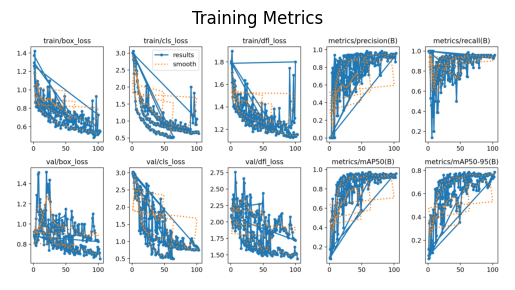

In [9]:
#Training Metrics Chart
from PIL import Image
import matplotlib.pyplot as plt

results_plot_path = "/content/gdrive/MyDrive/microscopy_project/plasmo_tryp_train2/results.png"

if os.path.exists(results_plot_path):
    img = Image.open(results_plot_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Training Metrics")
    plt.show()
else:
    print("Training results image not found.")


In [10]:
# Mount Google Drive
from google.colab import files

In [11]:
# Installed Packages
!pip install -q ultralytics ultralyticsplus segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.1/699.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 106.5 MB/s eta 0:00:00
ERROR: p

In [12]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import segmentation_models_pytorch as smp

In [13]:
# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [ ]:
# Upload image from your local device
uploaded = files.upload()

In [ ]:
#Get the filename of the uploaded image (the first one)
filename = next(iter(uploaded))

# Read image with OpenCV
image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.title("Uploaded Image")
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
#Load YOLOv8 Model for Object Detection
model_det = model
model_det.overrides['iou'] = 0.4
model_det.overrides['agnostic_nms'] = True
model_det.overrides['max_det'] = 1000

In [ ]:
# Run detection
results = model_det.predict(image)
boxes = results[0].boxes.xyxy.cpu().numpy()

In [ ]:
# Plot detections
plt.figure(figsize=(6, 6))
plt.title("YOLOv8 Detections")
plt.imshow(results[0].plot())
plt.axis("off")
plt.show()

In [ ]:
# Crop Bounding Boxes
crops = []
boxes_xywh = []

for (x1, y1, x2, y2) in boxes:
    x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
    crop = image[y1:y2, x1:x2]
    crops.append(crop)
    boxes_xywh.append((x1, y1, x2 - x1, y2 - y1))

print(f"Detected {len(crops)} objects.")

In [ ]:
#Loads U-Net
model_seg = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    classes=1,
    activation=None
).to(device)
model_seg.eval()

In [ ]:
#Transformation pipeline for crops
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((256, 256)),
    T.ToTensor()
])

In [ ]:
#Segment each crop
masks = []
for crop in crops:
    input_tensor = transform(crop).unsqueeze(0).to(device)
    with torch.no_grad():
        mask_pred = model_seg(input_tensor)
    masks.append(mask_pred.squeeze().cpu().numpy())

In [ ]:
# Draw Bounding Boxes from Masks and Visualize
image_full_with_boxes = image.copy()

for i, ((crop, mask), (x0, y0, w, h)) in enumerate(zip(zip(crops, masks), boxes_xywh)):
    mask_bin = (mask > 0.5).astype(np.uint8)
    mask_resized = cv2.resize(mask_bin, (crop.shape[1], crop.shape[0]), interpolation=cv2.INTER_NEAREST)

    contours, _ = cv2.findContours(mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    crop_boxed = crop.copy()
    if crop_boxed.ndim == 2 or crop_boxed.shape[2] == 1:
        crop_boxed = cv2.cvtColor(crop_boxed, cv2.COLOR_GRAY2RGB)

    for cnt in contours:
        x, y, w_box, h_box = cv2.boundingRect(cnt)
        cv2.rectangle(crop_boxed, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)
        cv2.rectangle(image_full_with_boxes,
                      (x0 + x, y0 + y),
                      (x0 + x + w_box, y0 + y + h_box),
                      (0, 0, 255), 2)


In [ ]:
# Plot the crop, mask, and crop with boxes
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.title("Crop")
plt.imshow(crop)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Segmentation")
plt.imshow(mask_resized, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Crop + Mask Boxes")
plt.imshow(crop_boxed)
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Final Result: Image with All Boxes
plt.figure(figsize=(12, 10))
plt.title("Original Image with All Detected and Segmented Boxes")
plt.imshow(image_full_with_boxes)
plt.axis("off")
plt.show()


In [ ]:
# Visualize a sample mask
if masks:
    plt.figure()
    plt.title("Sample Segmentation Mask")
    plt.imshow(masks[0])
    plt.colorbar()
    plt.axis("off")
    plt.show()